# Factors influencing unemployment before and during the pandemic

In [1]:
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bci = pd.read_csv('clean_bci.csv')
cci = pd.read_csv('clean_cci.csv')
cpi = pd.read_csv('clean_cpi.csv')
csi = pd.read_csv('clean_csi.csv')
inflation = pd.read_csv('clean_inflation.csv')
# percent
ir = pd.read_csv('clean_interest_rates.csv')
# percent
job_openings = pd.read_csv('clean_job_openings.csv')
# percent
pop = pd.read_csv('clean_population.csv')
# million
unemployed_per_opening = pd.read_csv('clean_unemployed_per_opening.csv')
unemployment = pd.read_csv('clean_unemployment.csv')
dollar = pd.read_csv('clean_dollar.csv')
# percent
other = pd.read_csv('clean_other.csv')
# tax in percent

The Consumer Confidence questions place a greater emphasis on employment and labor market conditions while the Consumer Sentiment survey emphasizes individual household finances.

In [2]:
datasets = [bci, cci, cpi, inflation, ir, job_openings, pop, unemployed_per_opening, unemployment, dollar]
df = reduce(lambda  left, right: pd.merge(left, right, on=['month'], how='outer'), 
            datasets).sort_values('month').reset_index(drop=True).rename(
    columns={'month': 'date', 'consumer_sentiment': 'csi', 'Total': 'unemployment'})
df.job_openings = df.job_openings.str.rstrip('%').astype(float)
df.population = df.population.str.rstrip('million').astype(float)
df = df[(df.date >= '2010-01') & (df.date < '2021-09')].reset_index(drop=True)
df = df.merge(other.rename(columns={'month':'date'}), on='date', how='outer')
df = df[['date', 'bci', 'cci', 'cpi', 'inflation', 'interest_rate', 'job_openings', 'population', 'dollar_strength',
         'unemployed_per_job_opening', 'unemployment', 'corporate_tax', 'income_tax', 'wages', 'hours']]
print('Shape:', df.shape)
# Interpolate
#df = df.merge(other.rename(columns={'month':'date'}), on='date', how='outer')
yearly_variables = ['income_tax', 'corporate_tax', 'wages', 'hours']
for var in yearly_variables:
    df[var] = df[var].interpolate()
df.head(5)

Shape: (140, 15)


,date,bci,cci,cpi,inflation,interest_rate,job_openings,population,dollar_strength,unemployed_per_job_opening,unemployment,corporate_tax,income_tax,wages,hours
0,2010-01,NaN,NaN,217.488,2.8,0.11,2.1,308.17,92.440300,5.3,9.8,35.0,35.0,52562.000000,1772.0
1,2010-02,101.2057,98.22324,217.281,2.7,0.13,2.0,308.38,93.886680,5.7,9.8,35.0,35.0,52679.166667,1772.5
2,2010-03,101.4201,98.21968,217.353,2.7,0.16,2.0,308.57,93.149878,5.7,9.9,35.0,35.0,52796.333333,1773.0
3,2010-04,101.3545,98.19614,217.403,2.9,0.20,2.4,308.76,92.639086,4.9,9.9,35.0,35.0,52913.500000,1773.5
4,2010-05,101.0459,98.19468,217.290,3.2,0.20,2.2,308.94,95.530640,5.0,9.6,35.0,35.0,53030.666667,1774.0


In [3]:
all_corr = df[df.date<'2020-01'].corr().unemployment.to_frame().reset_index().sort_values('unemployment').rename(columns={'unemployment': 'all_unemployment_corr'})
covid_corr = df[df.date>='2020-01'].corr().unemployment.to_frame().reset_index().rename(columns={'unemployment': 'covid_unemployment_corr'})
all_corr.merge(covid_corr).dropna().iloc[:-1]

,index,all_unemployment_corr,covid_unemployment_corr
0,population,-0.990001,0.044398
1,job_openings,-0.973941,-0.458982
2,cpi,-0.956357,-0.490600
4,cci,-0.948485,-0.629513
5,dollar_strength,-0.913006,0.684230
6,interest_rate,-0.711384,-0.488716
8,bci,0.056981,-0.458894
10,inflation,0.585612,-0.217936
12,unemployed_per_job_opening,0.980831,0.968455


The correlation between the unemployment rate and various economic factors has changed during the pandemic compared to any other time in the past 10 year. For example, 

- The relationship between unemployment and inflation has reversed during the pandemic.
- The relationship between unemployment and the strength of the dollar has also reversed during the pandemic.
- The unemployment rate has largely been correlated with population levels in the past but this appears to no longer be the case.
- Historically, the consumer confidence index was strongly correlated with unemployment but appears to be less so during the pandemic. 
- Historically, the business confidence index was weakly correlated with unemployment but appears to be much more correlated during the pandemic. 

Consumer confidence was lowest in 2021-08. The number of job openings was greatest in 2021-07. The unemployment rate was greatest in 2020-04. The number of unemployed per job opening was greatest in 2009-07.

<AxesSubplot:title={'center':'Unemployment rate'}, ylabel='Frequency'>

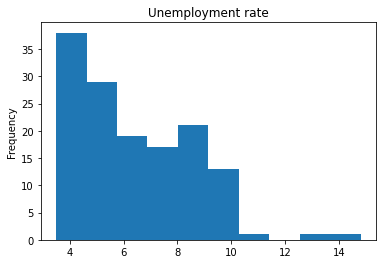

In [4]:
df.unemployment.plot.hist(title='Unemployment rate')

<AxesSubplot:title={'center':'Number of unemployed per job opening'}, ylabel='Frequency'>

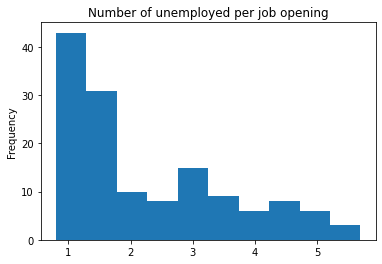

In [5]:
df.unemployed_per_job_opening.plot.hist(title='Number of unemployed per job opening')

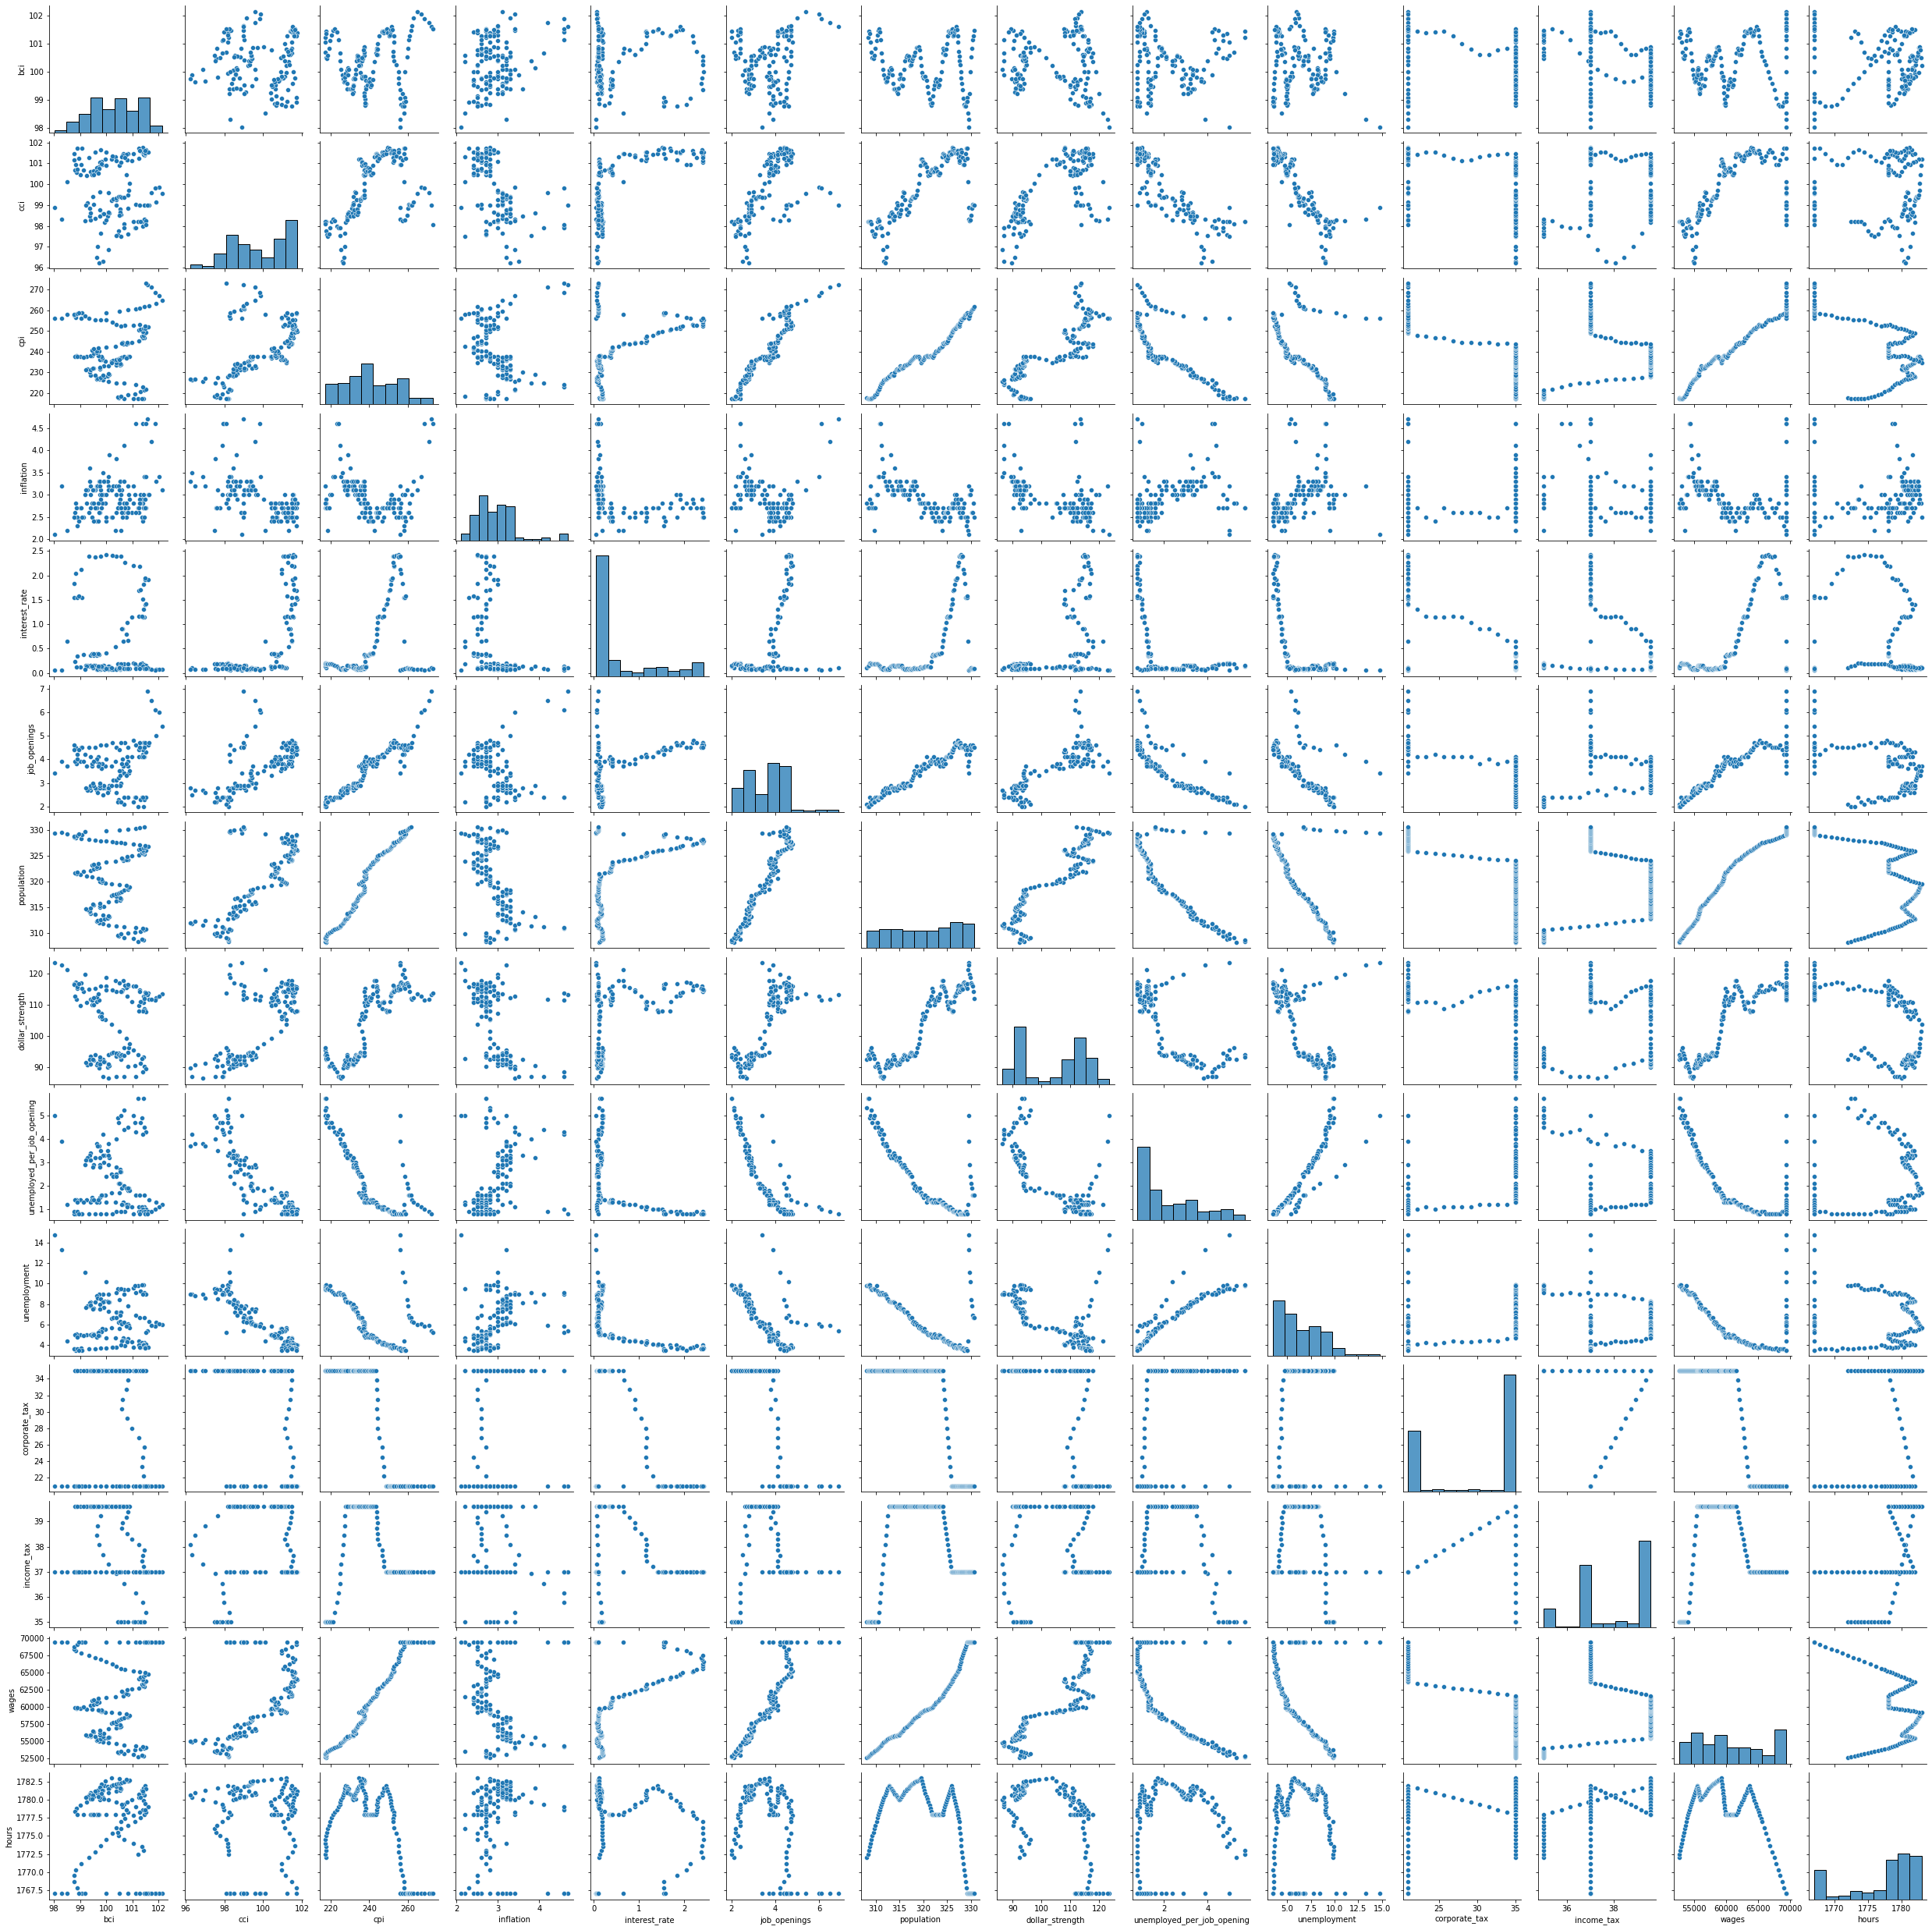

In [6]:
sns.pairplot(df)

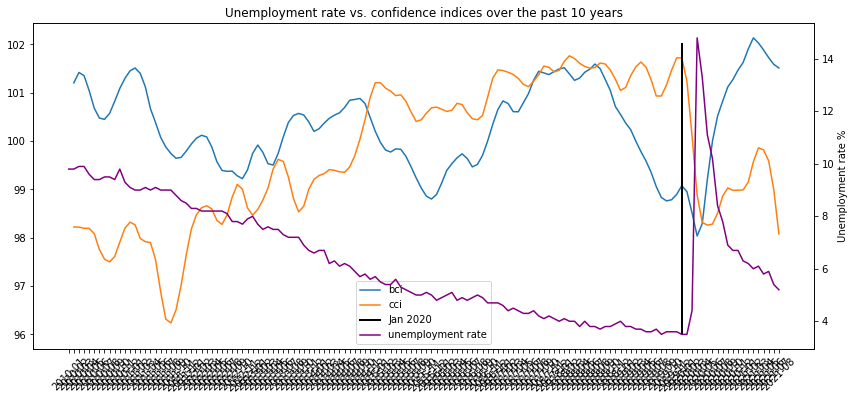

In [7]:
fig, ax1 = plt.subplots(figsize=(14, 6))
plt.xticks(rotation=45)
ax1.plot(df.date, df.bci, label='bci')
ax1.plot(df.date, df.cci, label='cci')
ax1.plot(['2020-01']*2, [96,102], label='Jan 2020', linewidth=2, color='black')
ax2 = ax1.twinx()
ax2.plot(df.date, df.unemployment, label='unemployment rate', color='purple')
ax2.set_ylabel('Unemployment rate %')
plt.title('Unemployment rate vs. confidence indices over the past 10 years')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)
plt.show()

Business confidence index was already pretty low before the pandemic began. Business confidence index appears to have recovered but consumer confidence index is still falling.

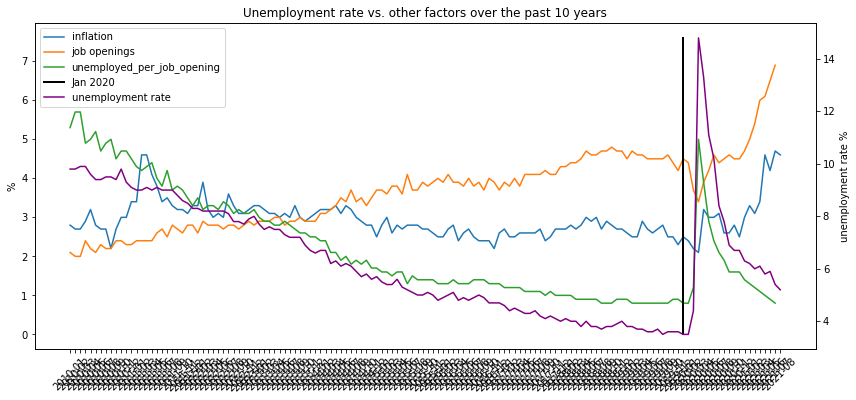

In [8]:
fig, ax1 = plt.subplots(figsize=(14, 6))
plt.xticks(rotation=45)
ax1.plot(df.date, df.inflation, label='inflation')
ax1.plot(df.date, df.job_openings, label='job openings')
ax1.plot(df.date, df.unemployed_per_job_opening, label='unemployed_per_job_opening')
ax1.plot(['2020-01']*2, [0,7.6], label='Jan 2020', color='black', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(df.date, df.unemployment, label='unemployment rate', color='purple')
ax1.set_ylabel('%')
ax2.set_ylabel('unemployment rate %')
plt.title('Unemployment rate vs. other factors over the past 10 years')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)
plt.show()

Inflation has been fairly constant over the past 10 years and we appear to be entering a period of stagflation (high unemployment and high inflation), if unemployment remains high. The upside in the number of job openings during the pandemic recovery is far greater than the downside at the start of the pandemic. 

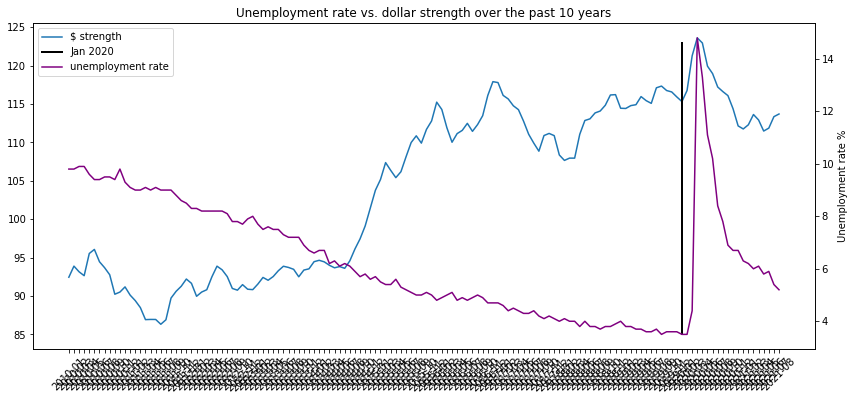

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 6))
plt.xticks(rotation=45)
ax1.plot(df.date, df.dollar_strength, label='$ strength')
ax1.plot(['2020-01']*2, [85,123], label='Jan 2020', linewidth=2, color='black')
ax2 = ax1.twinx()
ax2.plot(df.date, df.unemployment, label='unemployment rate', color='purple')
ax2.set_ylabel('Unemployment rate %')
plt.title('Unemployment rate vs. dollar strength over the past 10 years')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)
plt.show()

In [10]:
from scipy.stats import ttest_ind

# t-test between unemployment and all other variables
for var in ['bci', 'cci', 'cpi', 'inflation', 'interest_rate', 'job_openings', 'dollar_strength',
           'population', 'unemployed_per_job_opening', 'corporate_tax','income_tax', 'wages', 'hours']:
    T, p = ttest_ind(df.unemployment, df[var], nan_policy='omit')
    print(str(var) + ': p-values is ' + str(p))

bci: p-values is 0.0
cci: p-values is 0.0
cpi: p-values is 2.6942798171958586e-302
inflation: p-values is 2.177016384141841e-47
interest_rate: p-values is 1.484273677941901e-86
job_openings: p-values is 2.834580666156856e-31
dollar_strength: p-values is 1.458144907923261e-224
population: p-values is 0.0
unemployed_per_job_opening: p-values is 4.9418413545847714e-51
corporate_tax: p-values is 3.055252509259237e-119
income_tax: p-values is 1.9179661022930127e-257
wages: p-values is 8.047059387737592e-255
hours: p-values is 0.0


In [11]:
columns = ['bci', 'cpi', 'inflation', 'interest_rate', 'job_openings', 'population', 'dollar_strength',
           'unemployed_per_job_opening', 'unemployment', 'corporate_tax', 'income_tax', 'wages', 'hours']
norm_df = df.copy()
for col in columns:
    norm_df[col] = (norm_df[col] - norm_df[col].mean()) / norm_df[col].std()
norm_df.head(5)

,date,bci,cci,cpi,inflation,interest_rate,job_openings,population,dollar_strength,unemployed_per_job_opening,unemployment,corporate_tax,income_tax,wages,hours
0,2010-01,NaN,NaN,-1.696353,-0.299380,-0.614976,-1.638282,-1.789611,-1.085302,2.265876,1.537999,0.760915,-1.952953,-1.529771,-1.015795
1,2010-02,0.998256,98.22324,-1.711463,-0.505850,-0.587791,-1.744445,-1.758295,-0.952812,2.559610,1.537999,0.760915,-1.952953,-1.507883,-0.919250
2,2010-03,1.236732,98.21968,-1.706207,-0.505850,-0.547013,-1.744445,-1.729960,-1.020304,2.559610,1.582737,0.760915,-1.952953,-1.485996,-0.822705
3,2010-04,1.163766,98.19614,-1.702558,-0.092911,-0.492641,-1.319791,-1.701626,-1.067093,1.972141,1.582737,0.760915,-1.952953,-1.464108,-0.726159
4,2010-05,0.820512,98.19468,-1.710806,0.526497,-0.492641,-1.532118,-1.674783,-0.802223,2.045575,1.448525,0.760915,-1.952953,-1.442220,-0.629614


In [12]:
!pip install statsmodels

In [13]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as sfm


model1 = 'unemployment~bci+cci+interest_rate+job_openings+unemployed_per_job_opening+income_tax+wages+hours+dollar_strength'
lm1   = sfm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           unemployment   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     799.1
Date:                Sat, 09 Oct 2021   Prob (F-statistic):          6.52e-108
Time:                        17:31:42   Log-Likelihood:                -26.791
No. Observations:                 138   AIC:                             73.58
Df Residuals:                     128   BIC:                             102.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           